# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # Erase everything, start from scratch!

# Load the data from package funFEM
suppressPackageStartupMessages({
    library(funFEM) # Suppress all loading package messages
})
data(velib)
#help("velib")

In [2]:
# Data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

# Consider a subsample
set.seed(0)
n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# Select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

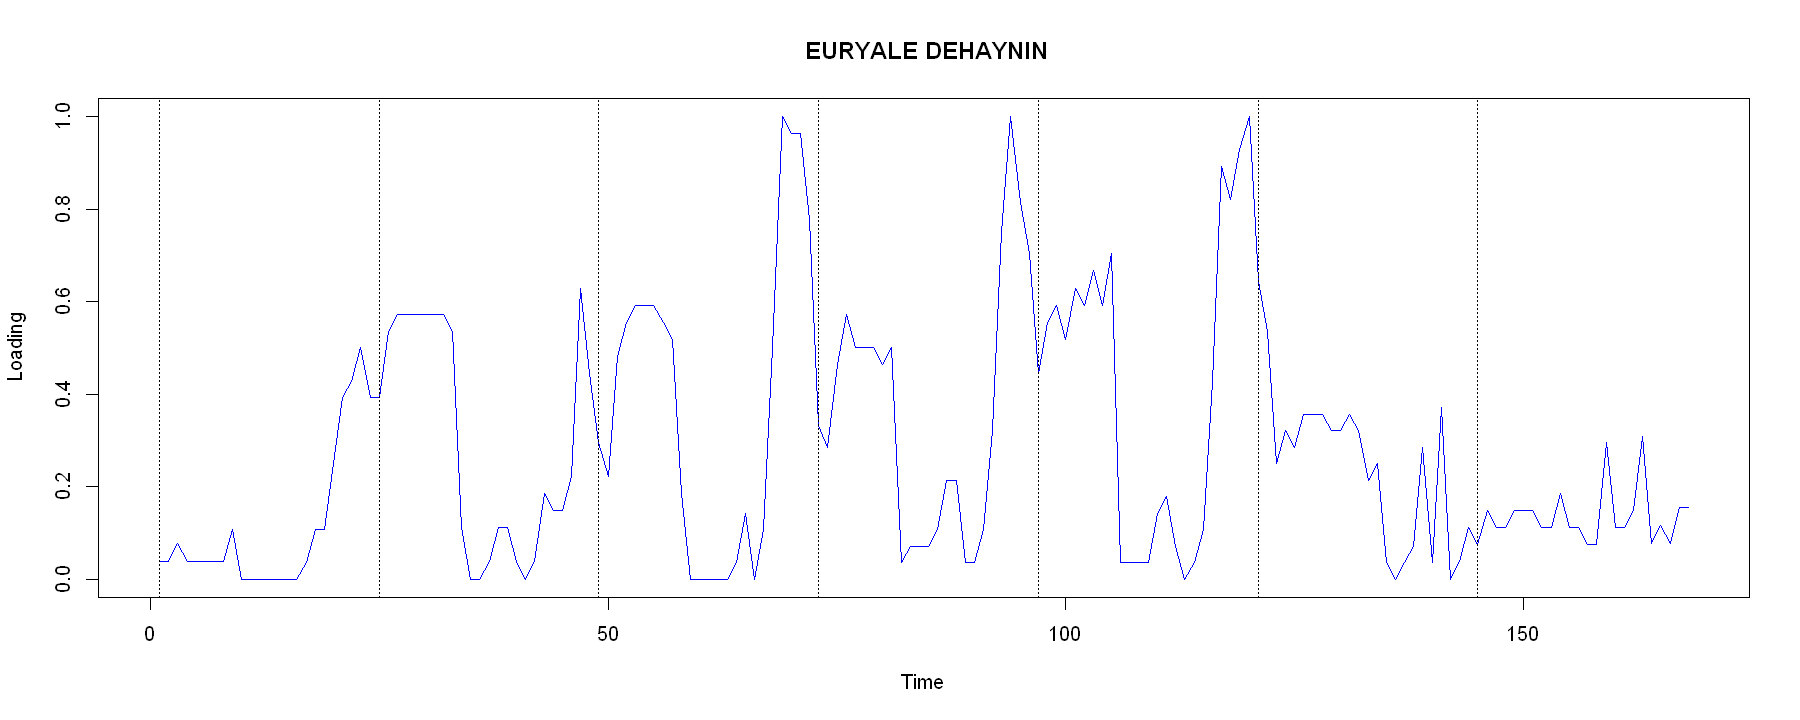

In [3]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))
options(repr.plot.width=15, repr.plot.height=6)

plot(x[1,], col="blue", type="l", ylim=c(0, 1), 
     xlab="Time", ylab="Loading", main=rownames(x)[1])
abline(v=timeTick, lty="dotted")

In [4]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
# rownames(x) <- 1:nrow(x)

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?
3. Investigate the temporal correlation of the variables. 
For instance, for a given station, plot the loading at t+h versus loading at time t.
Visualize the correlation matrix by an image plot. Interpret the result.
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use a different color for stations which are located on a hill.
5. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

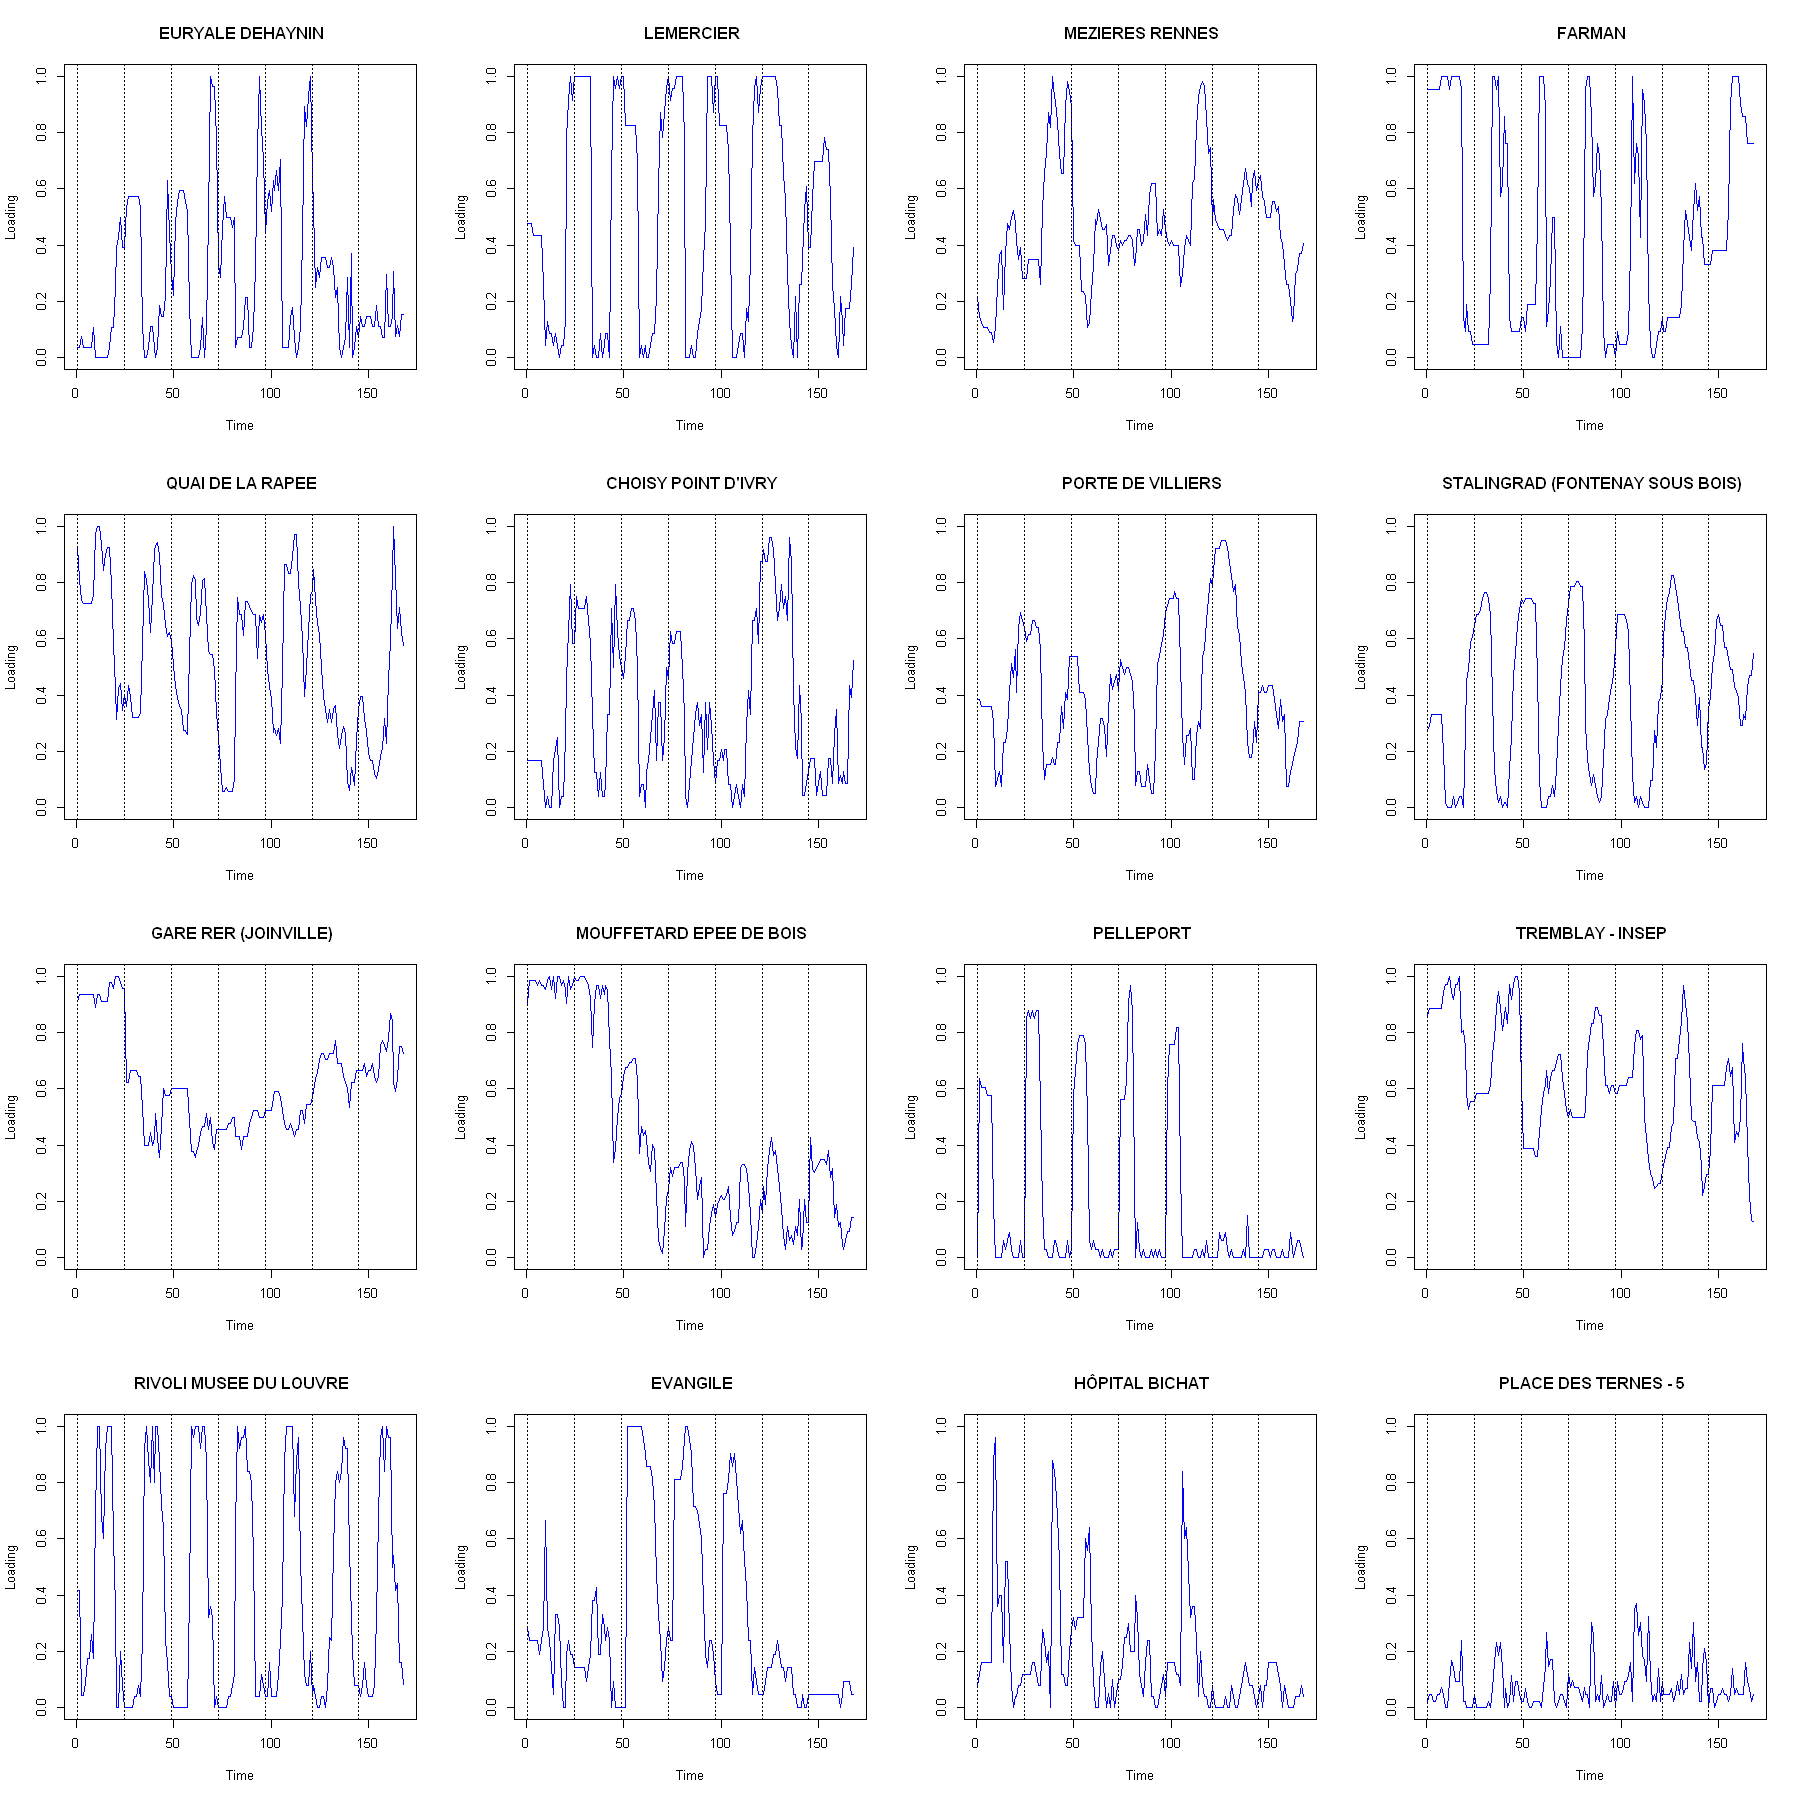

In [5]:
par(mfrow=c(4,4))
options(repr.plot.width=15, repr.plot.height=15)
for (i in 1:16) {
    plot(x[i,], col="blue", type="l", ylim=c(0, 1), xlab="Time",
         ylab="Loading", main=rownames(x)[i])
    abline(v=timeTick, lty="dotted")
}

On peut voir que pour la plupart des graphiques, on trouve une certaine périodicité dans l'utilisation des vélos. Ceci correspond à la nuit où le taux d'occupation vaut 1 (ou des pics élevés) donc la station est remplie. Une exception semblerait être le graphique 9, où l'utilisation est constante.

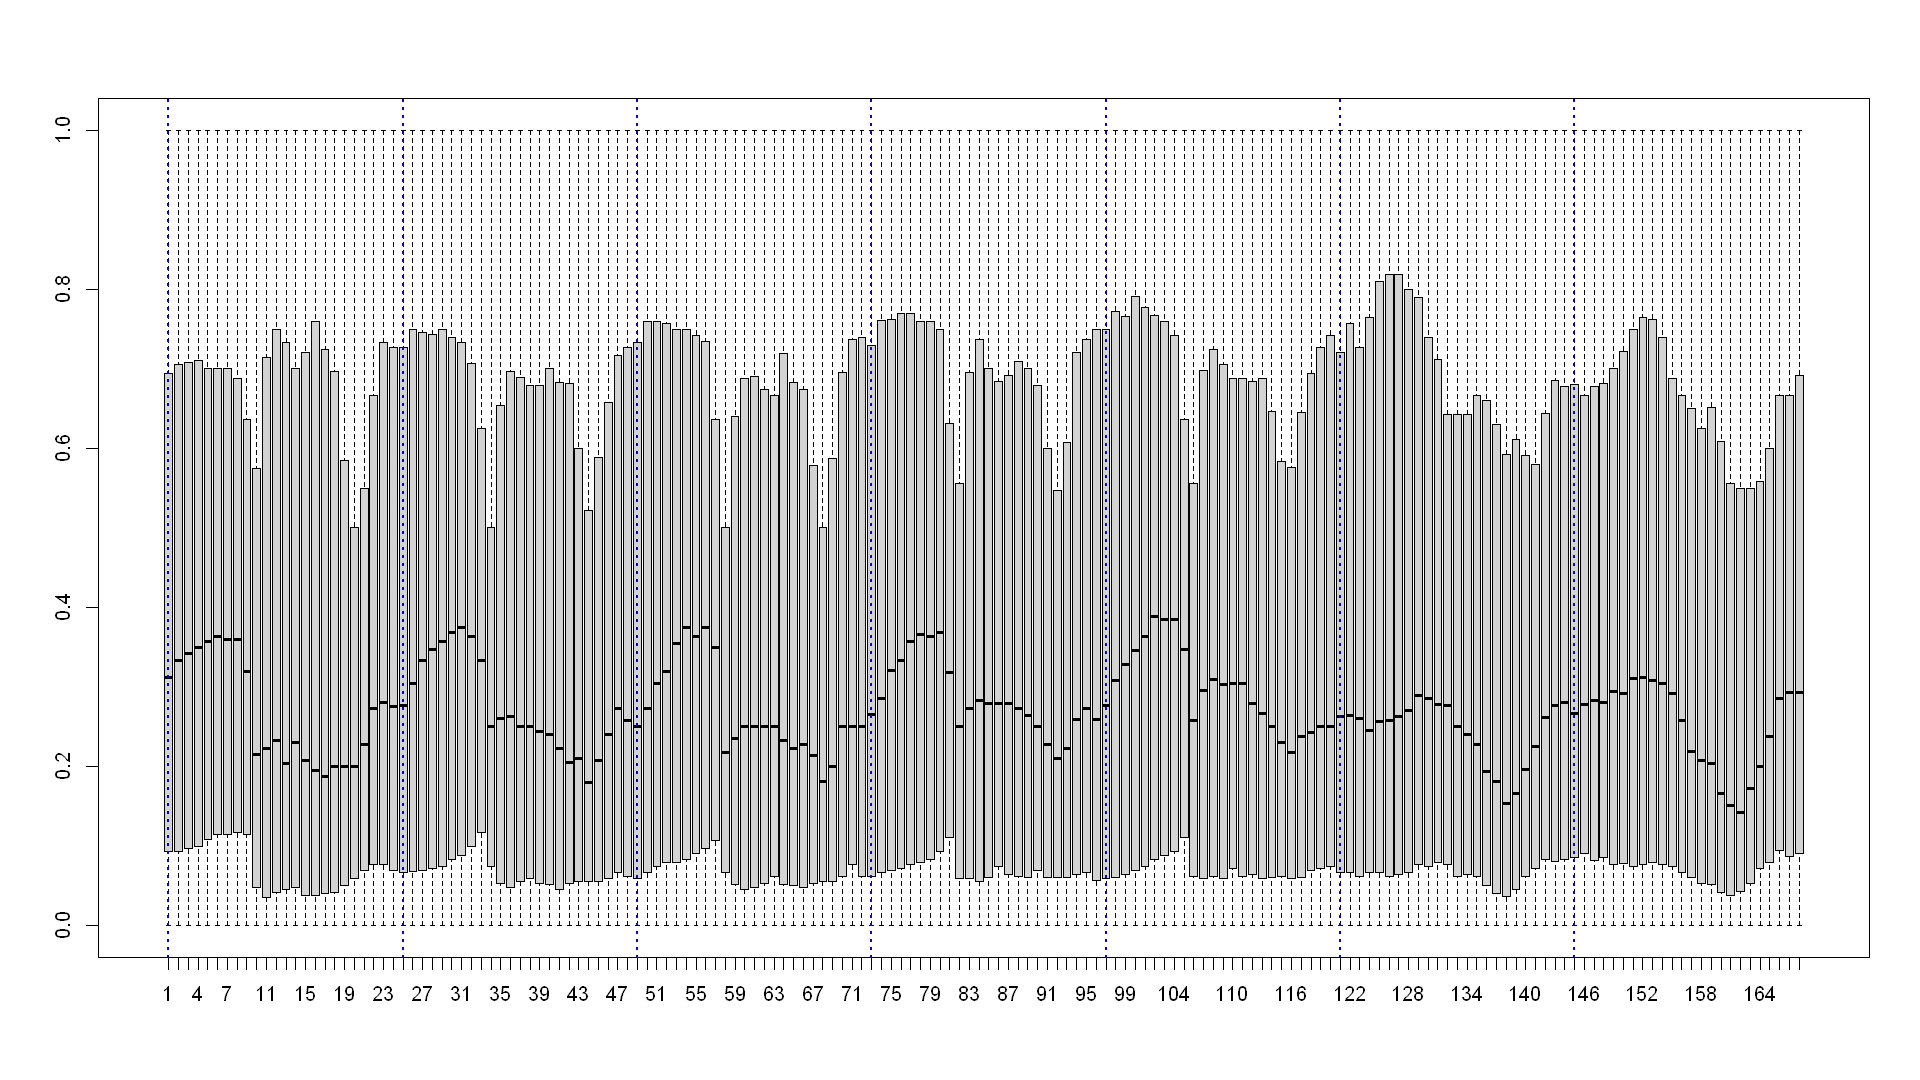

In [6]:
options(repr.plot.width=16, repr.plot.height=9)
boxplot(x)
abline(v=timeTick, lty="dotted", col="blue", lwd=2)

La médiane se trouve environ à 0.3 (donc 30% d'occupation).
<br>
Il y a des oscillation du lundi à vendredi qui est la même mais le week-end la saisonnalité est différente.
<br>
La distribution n'est pas symétrique, c'est-à-dire que l'écart entre le premier quartile et la mediane, et entre la médiane et le troisième quartile n'est pas le même.
<br>
Par contre, la dispersion à la moyenne est similaire dans tous les graphiques et assez élevée. En effet, le premier quartile se trouve à la même hauteur dans tous les cas, et le troisième quartile présente une périodicité. Globalement, le graphique ressemble à une loi uniforme.

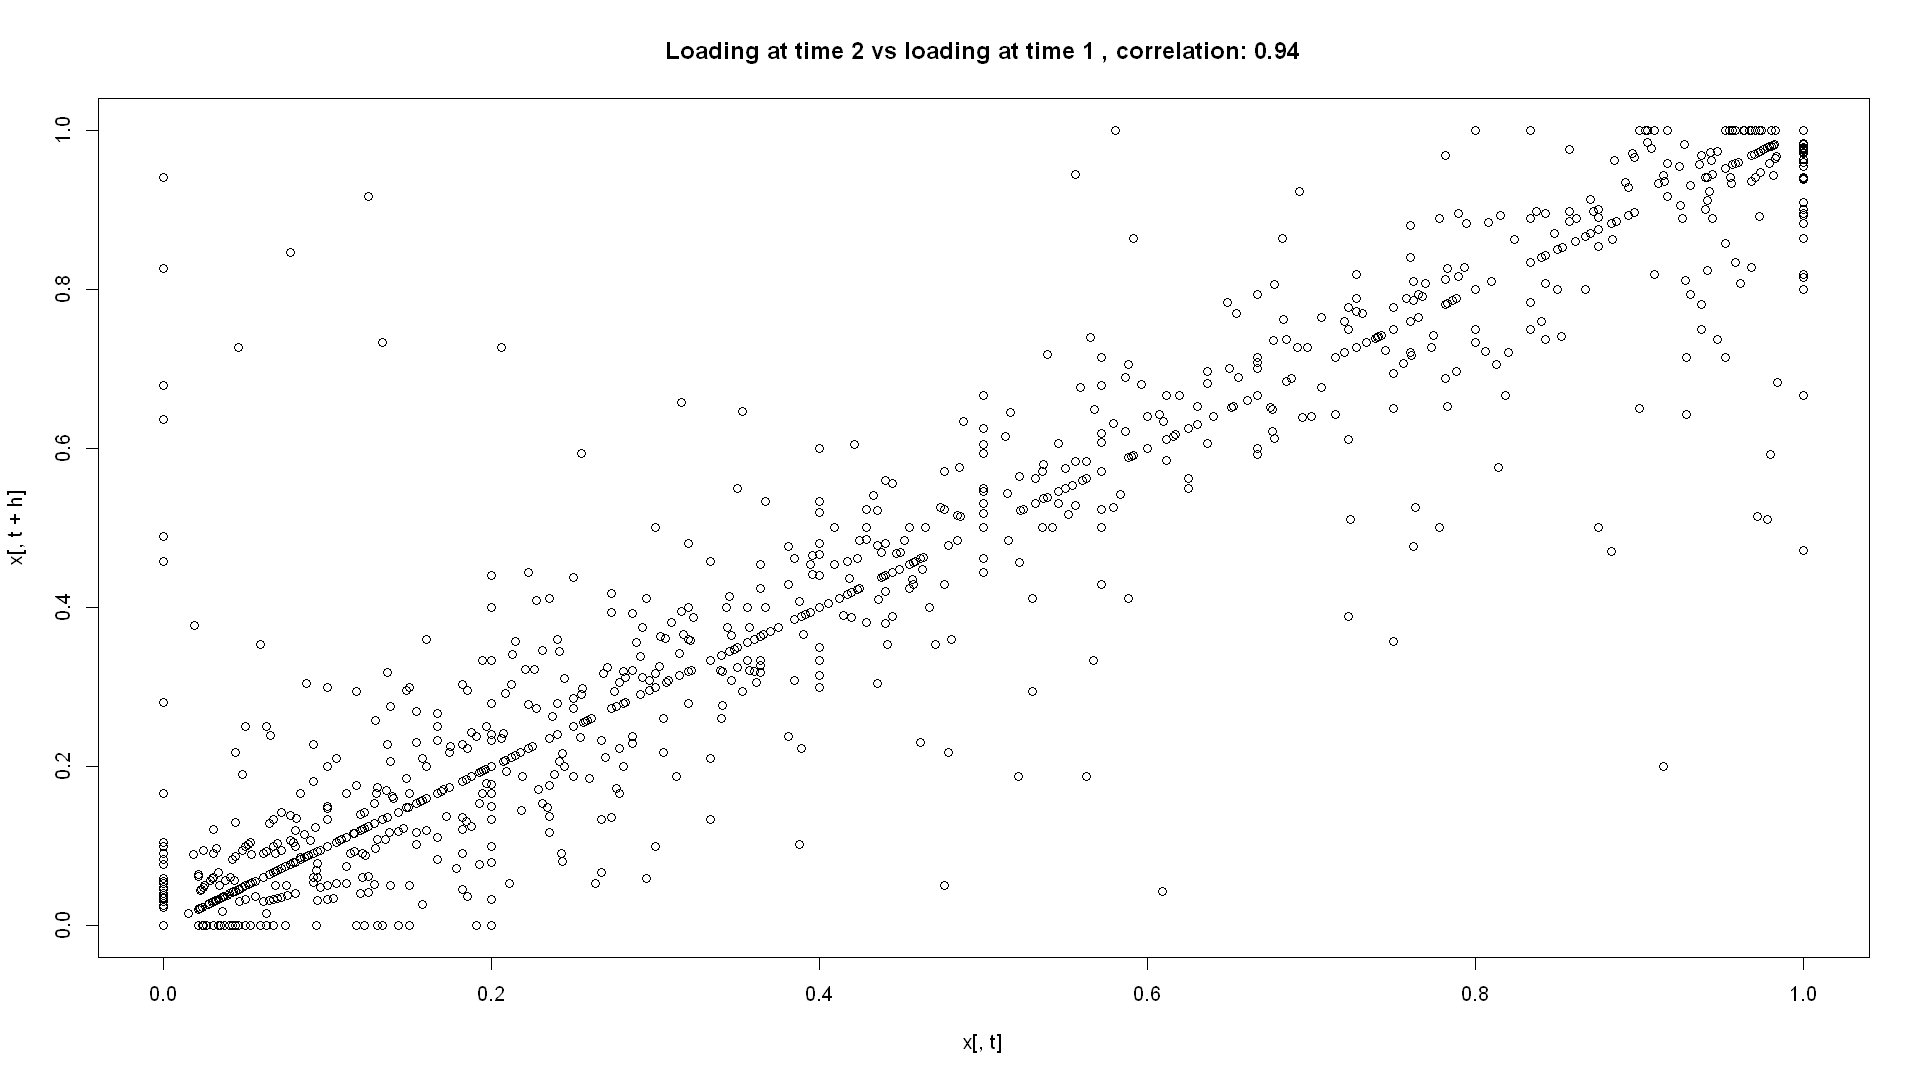

In [7]:
h <- 1
t <- 1

mycor <- round(cor(x[,t], x[,t+h]), 2)
plot(x[,t], x[,t+h], main=paste("Loading at time", t+h, "vs loading at time", t,
                                 ", correlation:", mycor))

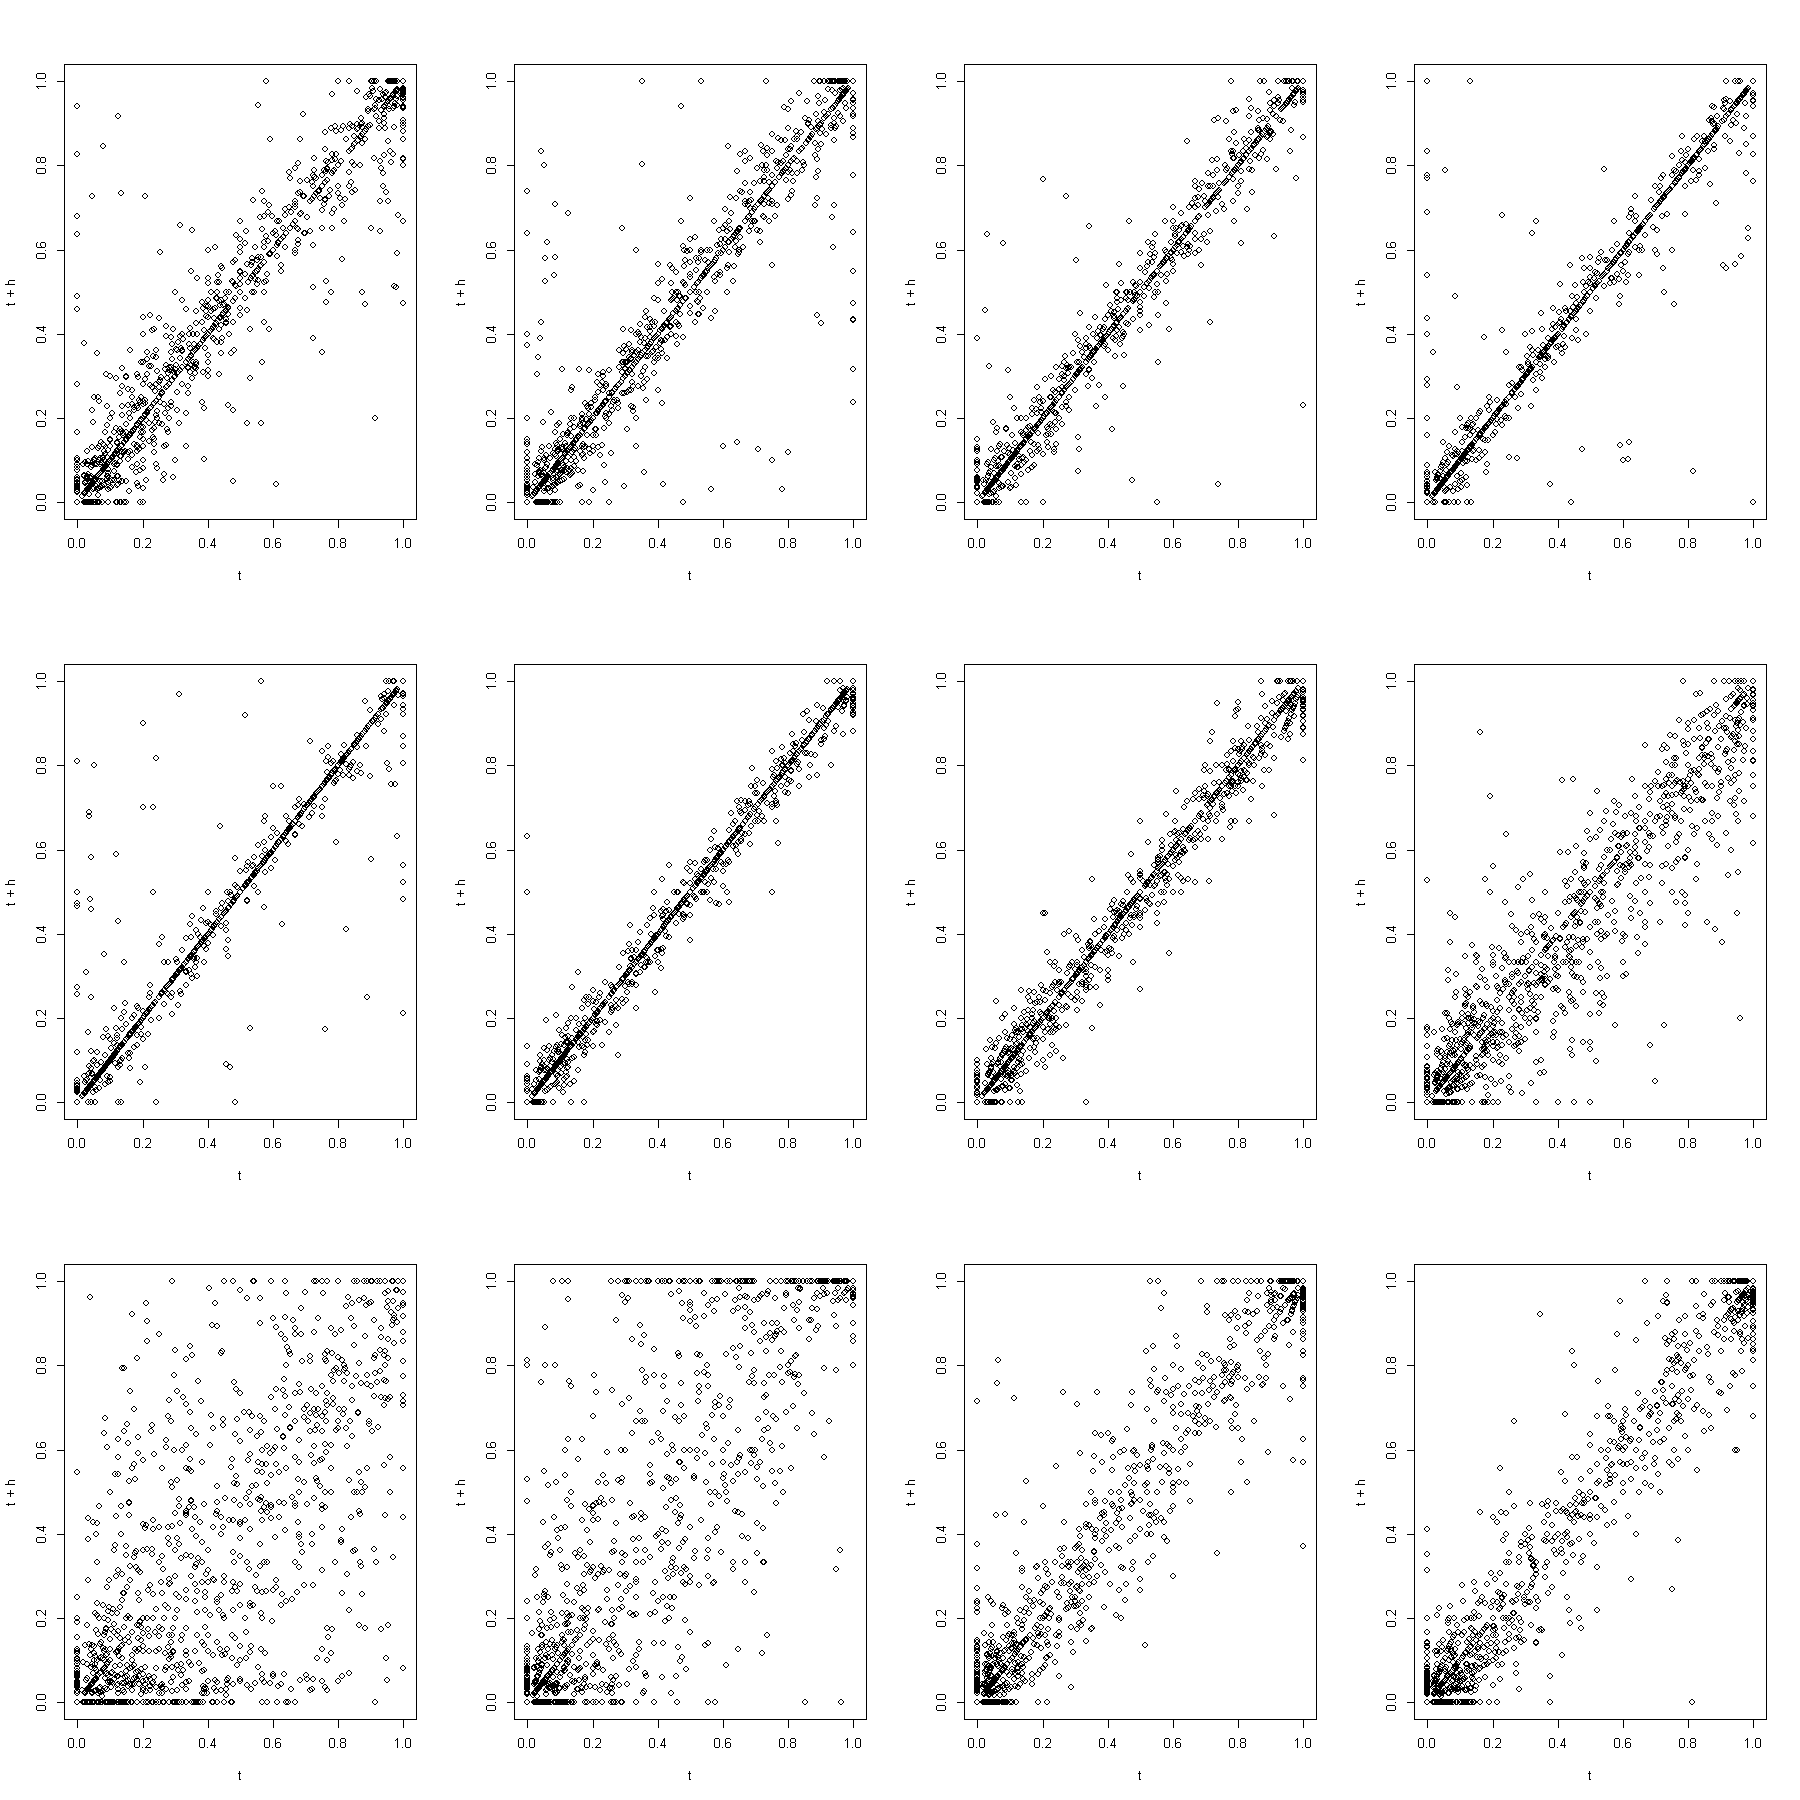

In [8]:
par(mfrow=c(3,4))
options(repr.plot.width=15, repr.plot.height=15)
for (t in 1:12) {
    plot(x[,t], x[,t+h], xlab="t", ylab="t + h")
}

corrplot 0.84 loaded



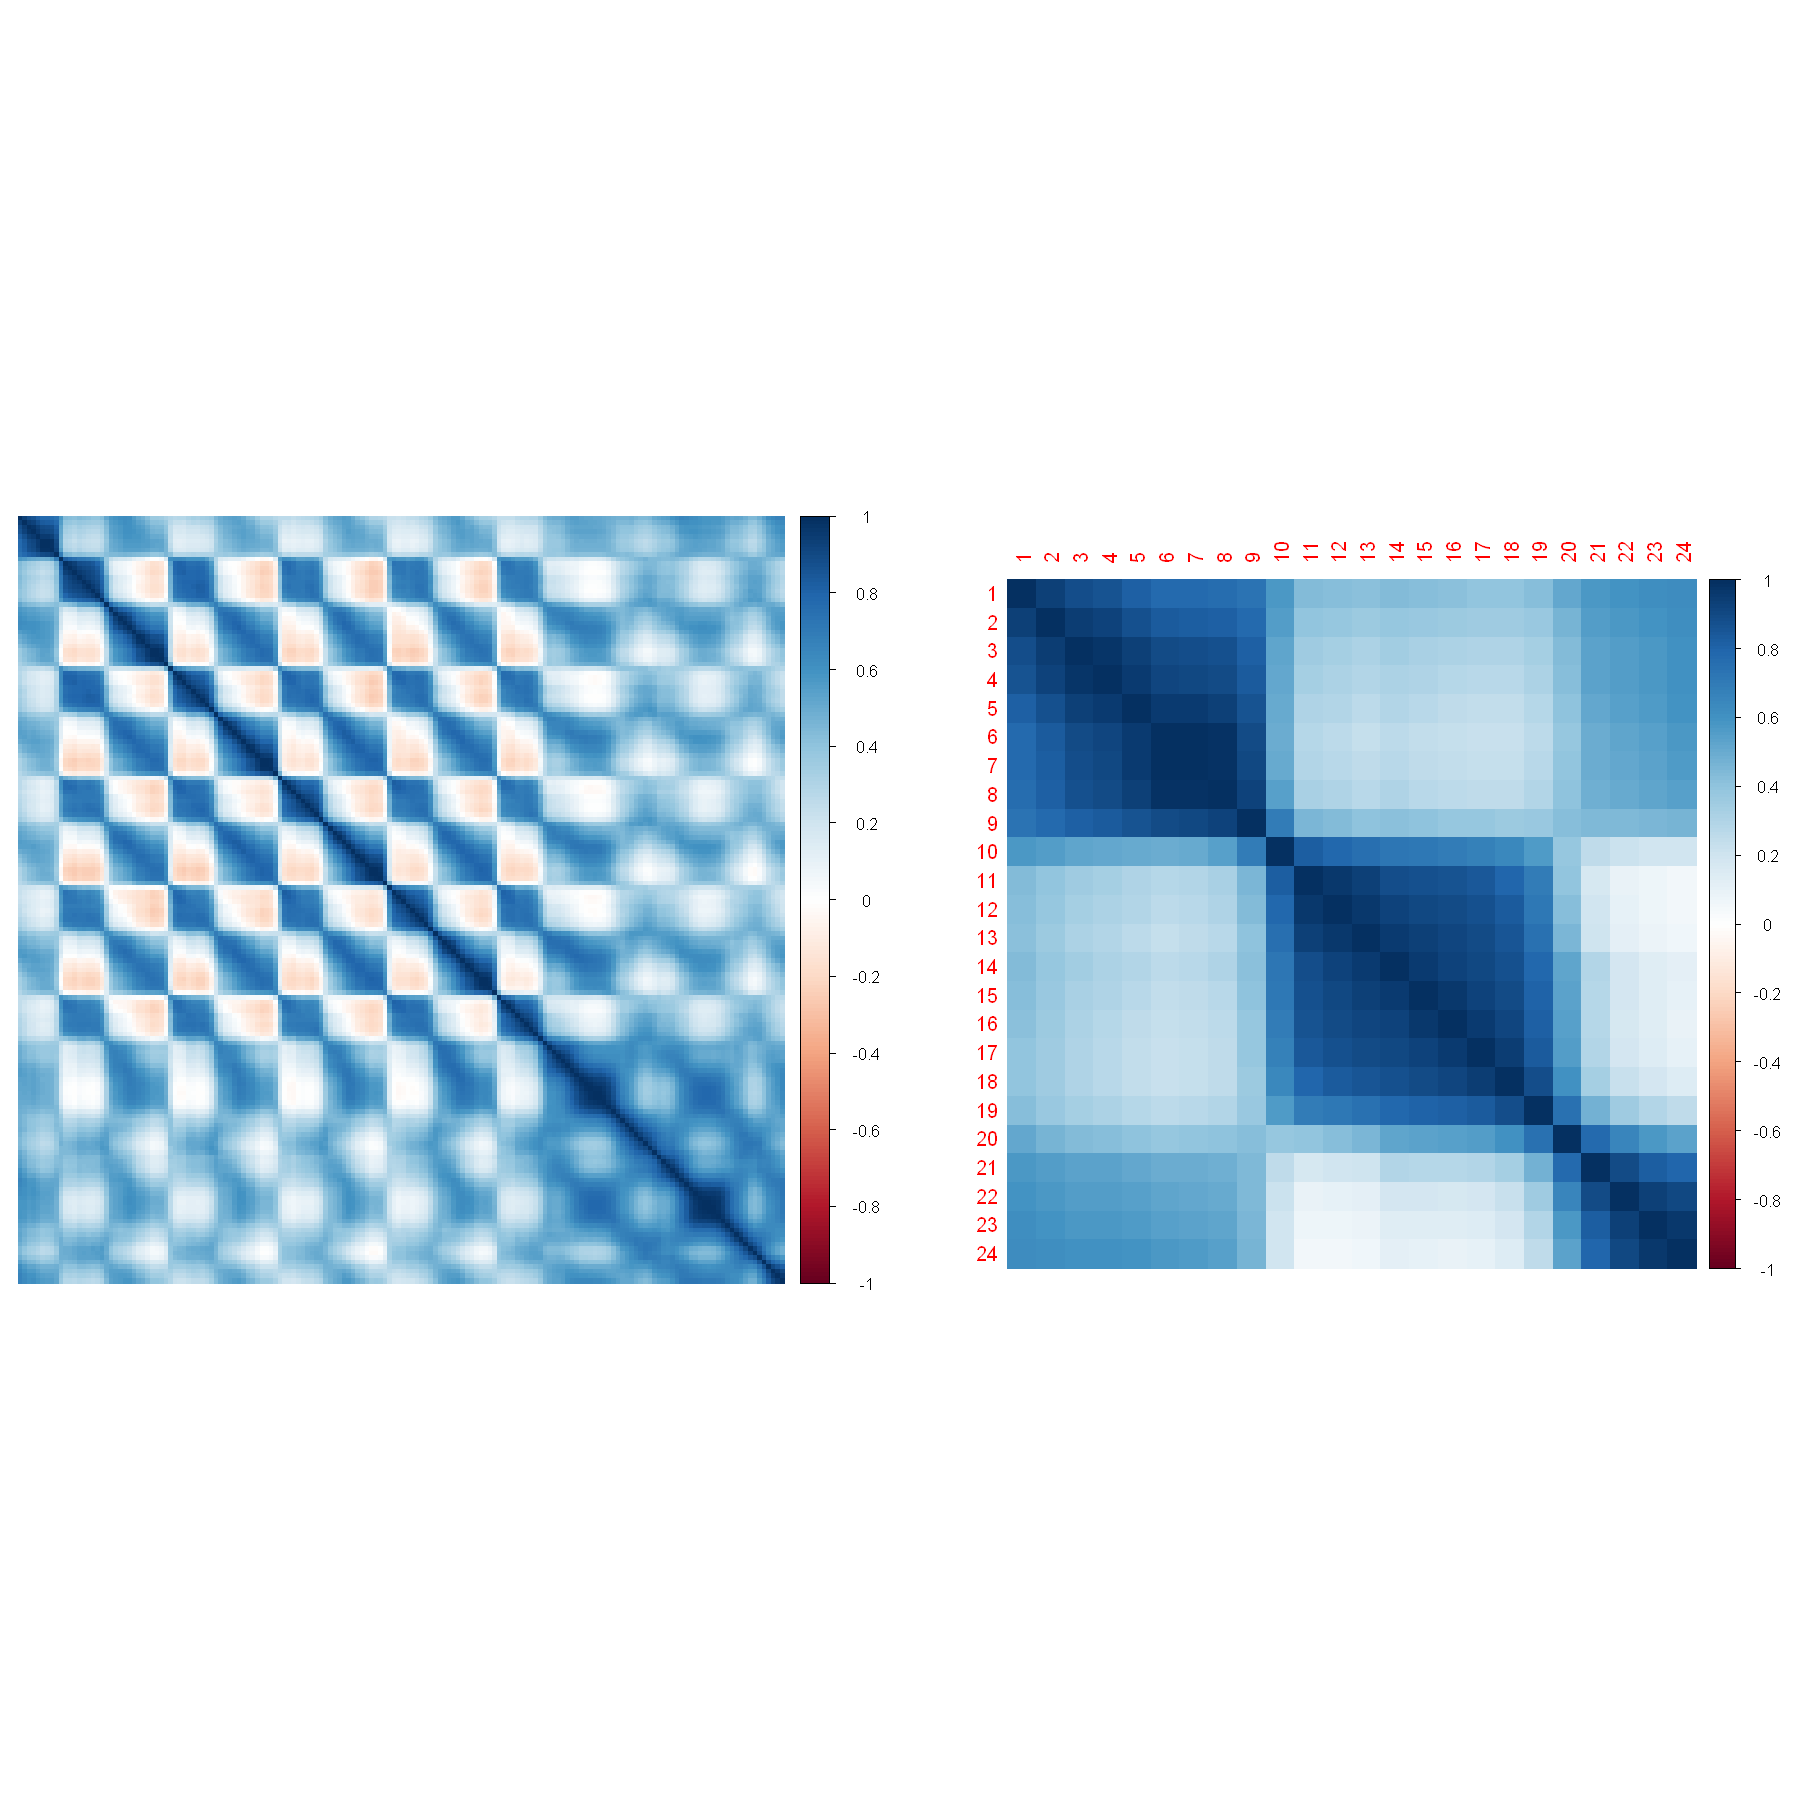

In [9]:
library(corrplot)

cormat <- cor(x)
par(mfrow=c(1,2))
corrplot(cormat, tl.pos="n", method="color")
corrplot(cormat[1:24,1:24], method="color")

On peut voir que le comportement la nuit est le même donc la corrélation est proche de 1. Par contre dans la journée le chargement est différent donc la corrélation diminue, sans par contre devenir négative.
<br>
Sur le corrplot de gauche, on peut voir la distinction entre les jours de la semaine et le week-end.

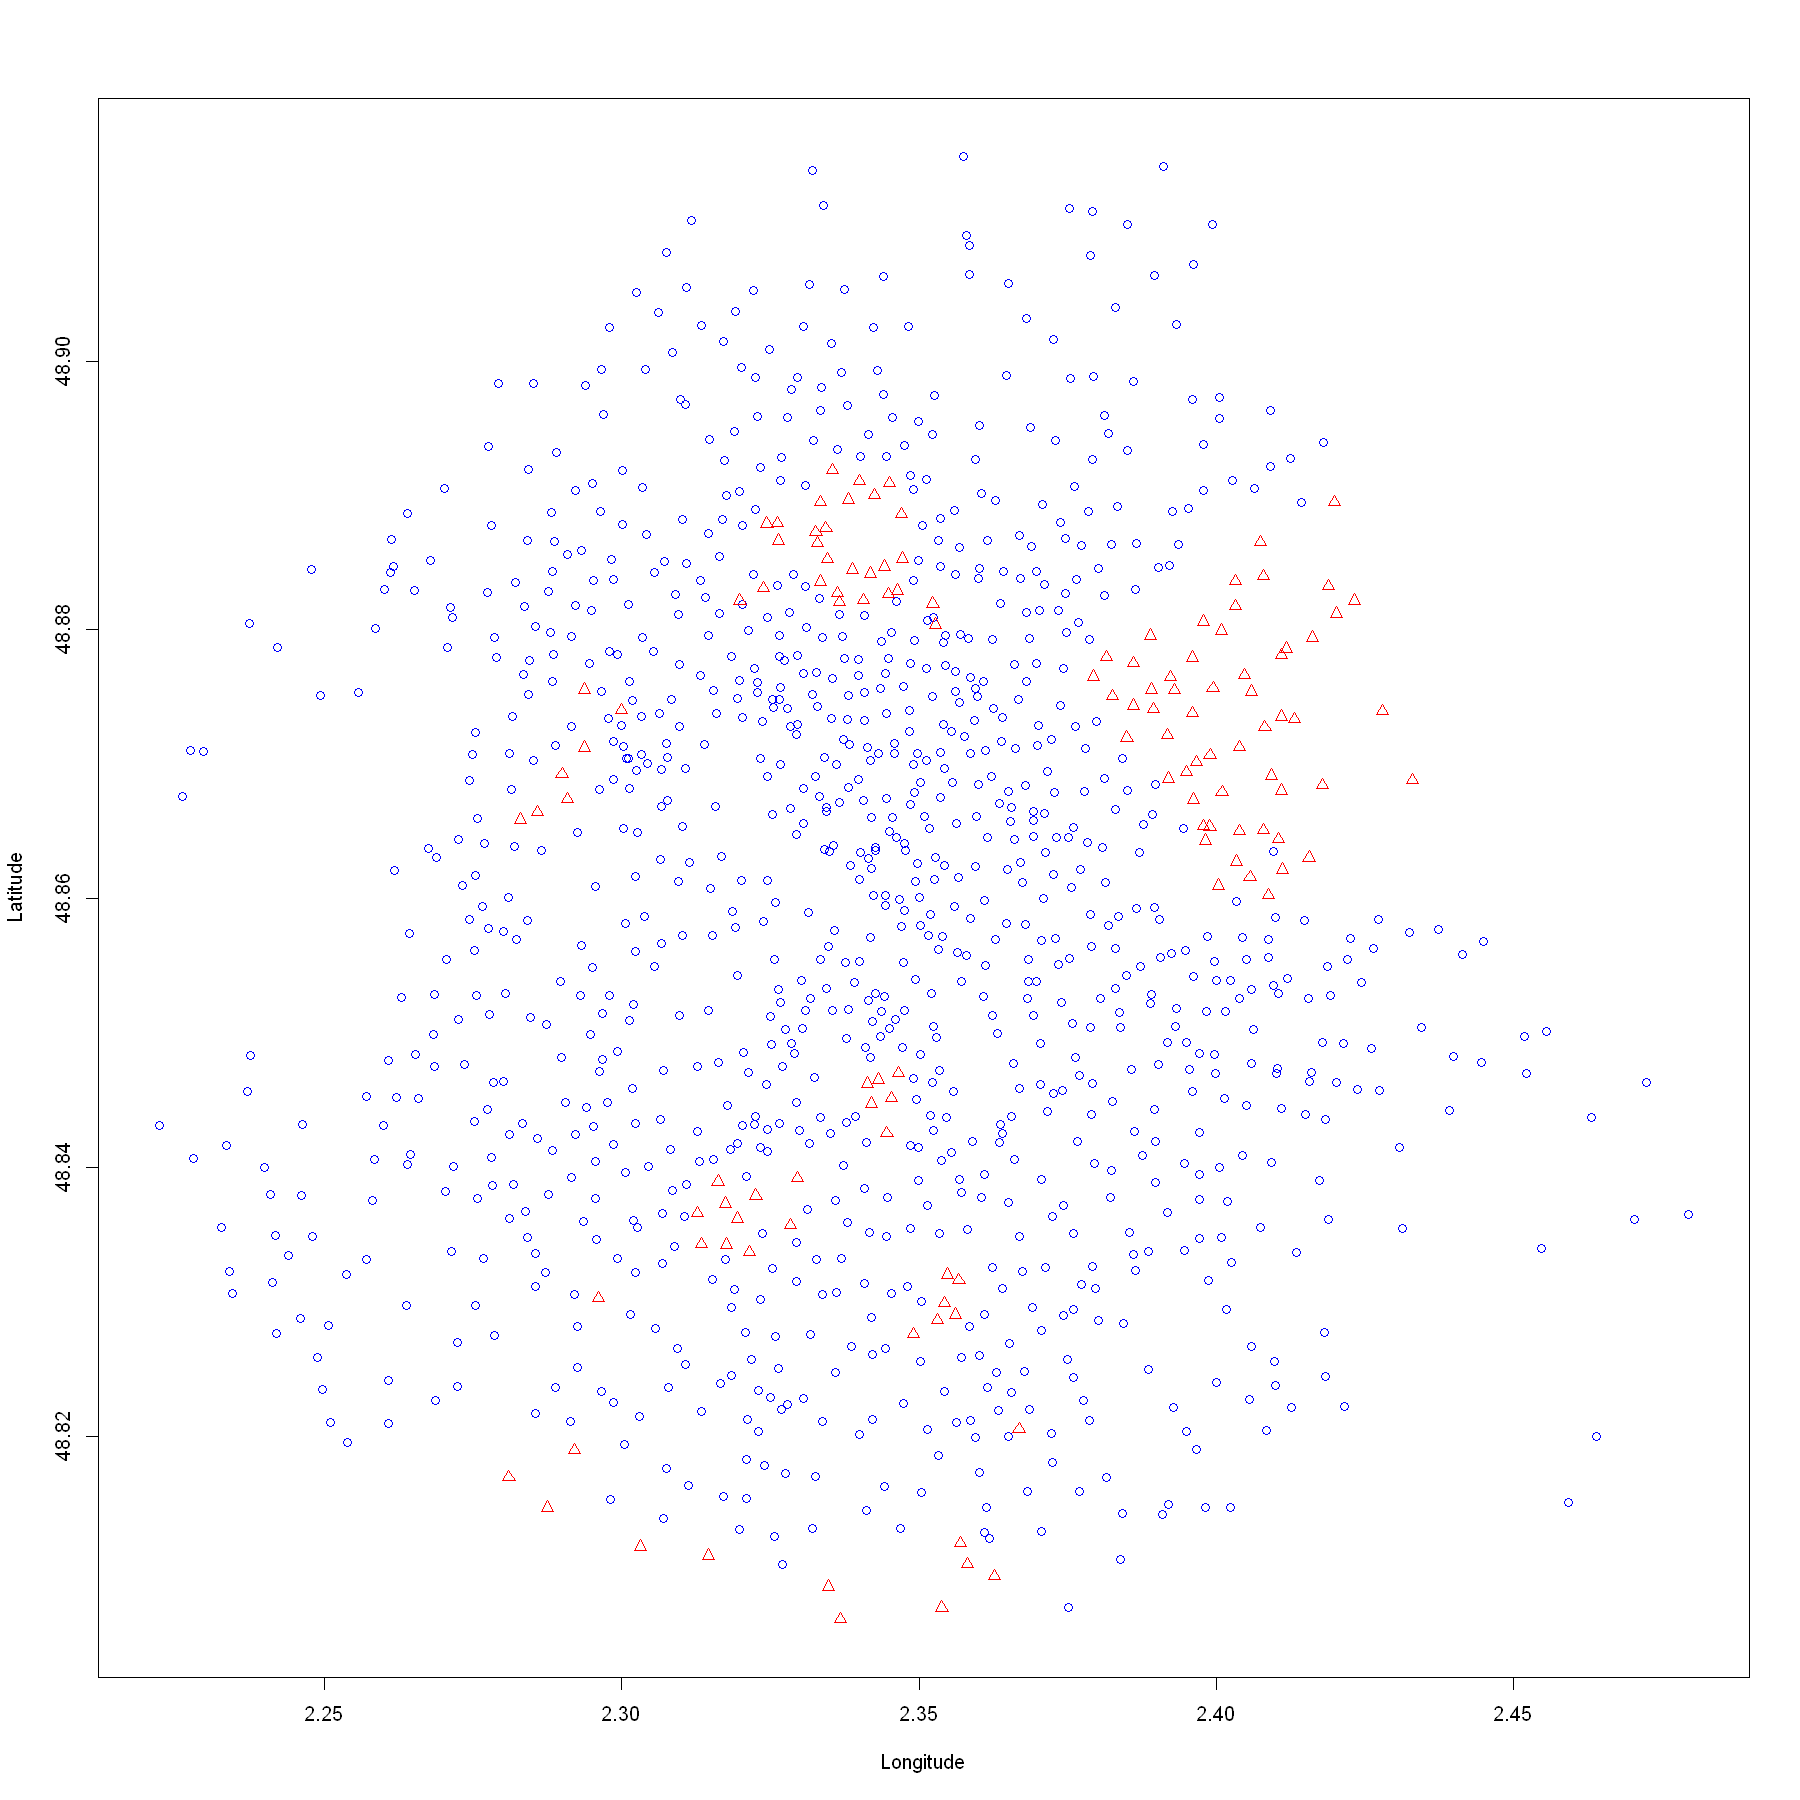

In [10]:
longitude <- velib$position$longitude
latitude <- velib$position$latitude

plot(longitude, latitude, col=ifelse(velib$bonus==1, "red", "blue"),
     xlab="Longitude", ylab="Latitude", pch=velib$bonus+1)

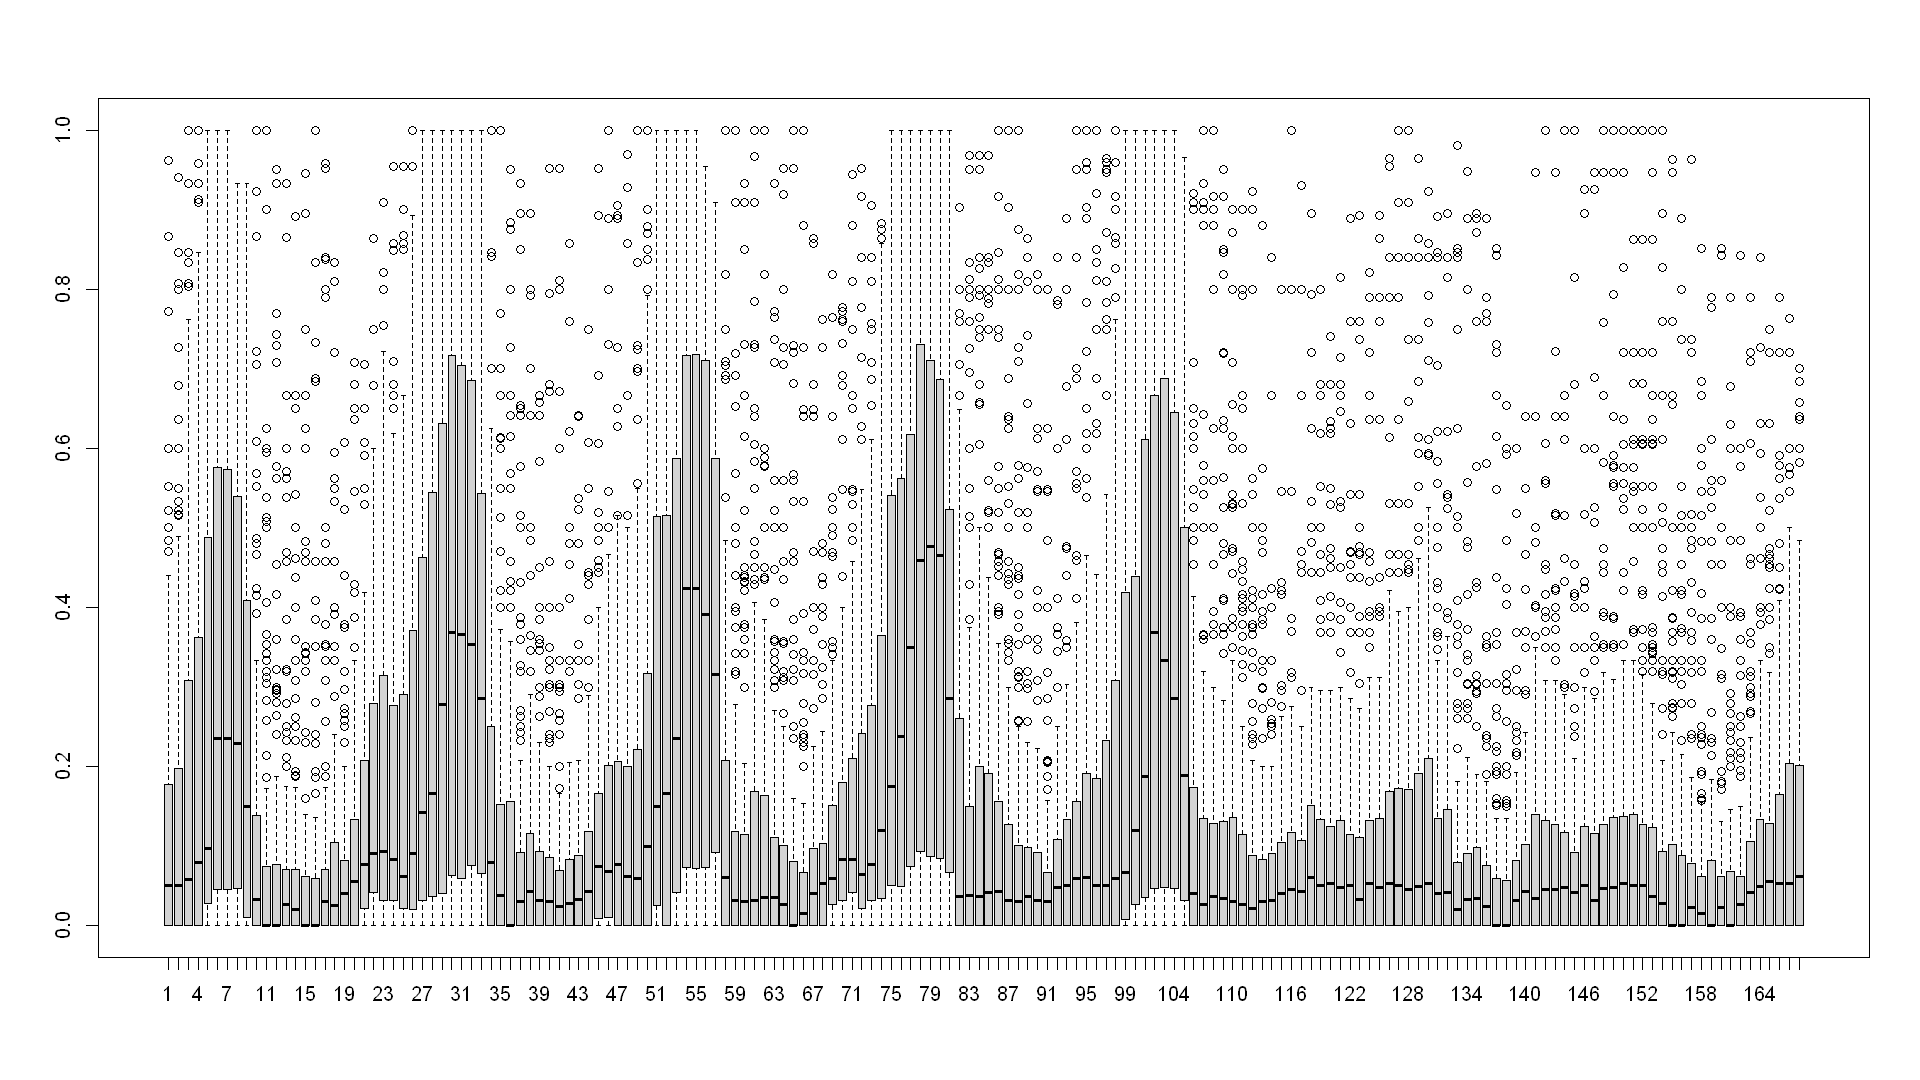

In [11]:
options(repr.plot.width=16, repr.plot.height=9)
colline <- which(velib$bonus == 1)
boxplot(x[colline,])

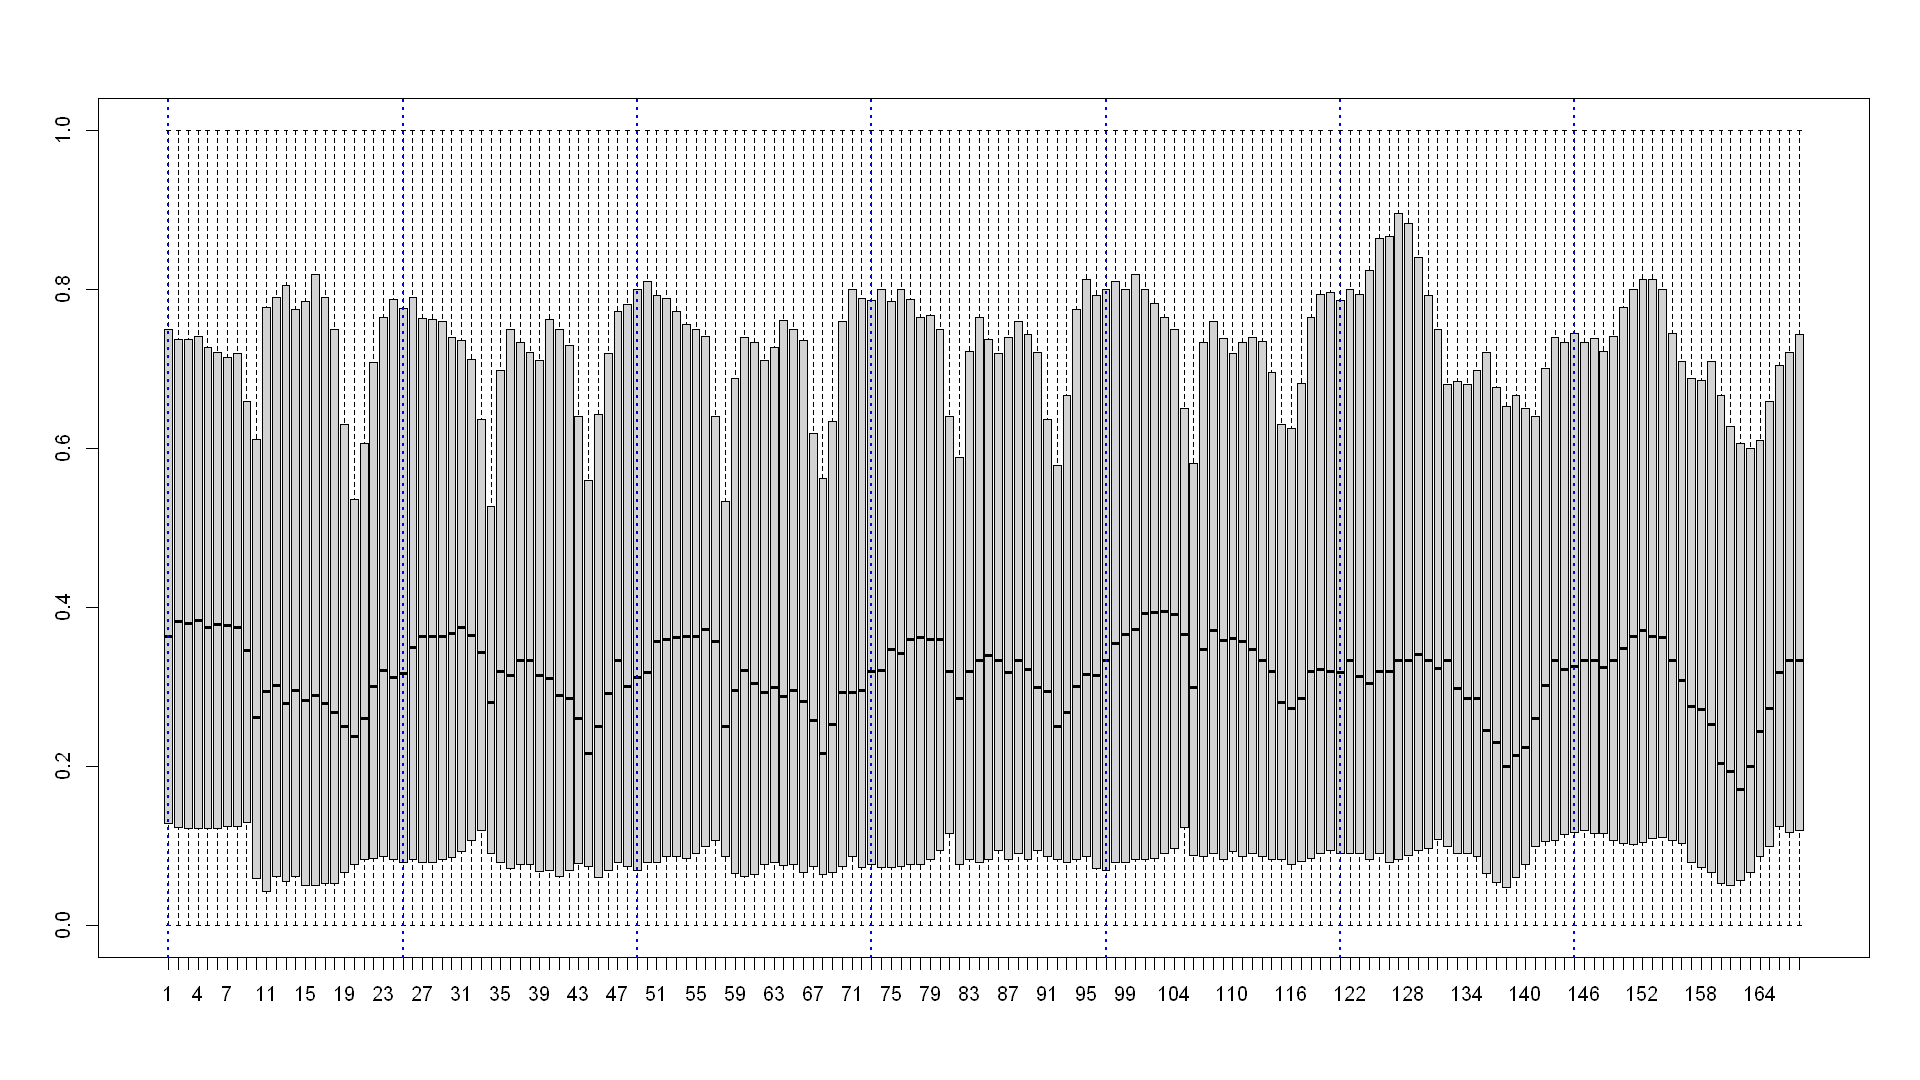

In [12]:
options(repr.plot.width=16, repr.plot.height=9)
no.colline <- which(velib$bonus == 0)
boxplot(x[no.colline,])
abline(v=timeTick, lty="dotted", col="blue", lwd=2)